# Classification Day 1
  #KNN - Machine learning using K nearest neighbours(KNN)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer #importing data from scikit learn

In [2]:
#passed object and its properties in i variable
i = load_breast_cancer()

In [8]:
#This dataframe has all the predictor/independent var not the target/dependent var
cancer=pd.DataFrame(i.data, columns=i.feature_names)

In [5]:
#target variable
i.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
#Adding a new cloumn tARGET
cancer["target"]= i.target


In [10]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
#Defining the X and Y values
x=cancer.drop("target", axis=1)
y=cancer.target

In [ ]:
#Find the missing values if any
cancer.isnull().sum()

In [12]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=123)

In [20]:
#firstly we are predicting values using logistic regression
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel= LogisticRegression() #initiating machine
model = logmodel.fit(xtrain,ytrain) #fit model on data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
predictions=logmodel.predict(xtest) #prediction
predictions

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [29]:
#Accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,cohen_kappa_score

In [25]:
accuracy_score(ytest,predictions)

0.9824561403508771

In [26]:
confusion_matrix(ytest,predictions)

array([[ 66,   2],
       [  1, 102]], dtype=int64)

In [27]:
(66+102)/(66+102+3)  #accuracy from confusion matrix

0.9824561403508771

In [28]:
classification_report(ytest,predictions)

'              precision    recall  f1-score   support\n\n           0       0.99      0.97      0.98        68\n           1       0.98      0.99      0.99       103\n\n   micro avg       0.98      0.98      0.98       171\n   macro avg       0.98      0.98      0.98       171\nweighted avg       0.98      0.98      0.98       171\n'

In [30]:
cohen_kappa_score(ytest,predictions)

0.9632863379374508

In [ ]:
#Classification using KNN


In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier()

In [33]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
model_knn=knn.predict(xtest)

In [36]:
print(accuracy_score(ytest,model_knn))
print(cohen_kappa_score(ytest,model_knn))

0.9298245614035088
0.8512827946079142


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


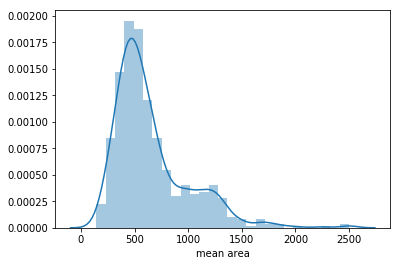

In [39]:
sns.distplot(cancer["mean area"])

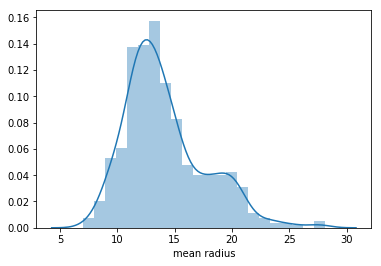

In [40]:
sns.distplot(cancer["mean radius"])

In [42]:
#in order tpo scale data we use standard scalar for z transformation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


In [43]:
scaled=sc.fit_transform(cancer.drop("target",axis =1))

In [46]:
scaled_cancer=pd.DataFrame(scaled,columns=cancer.columns[:30])

In [48]:
scaled_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [49]:
scaled_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,-3.162867e-15,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
mean texture,569.0,-6.530609e-15,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
mean perimeter,569.0,-7.078891e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
mean area,569.0,-8.799835e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
mean smoothness,569.0,6.132177e-15,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
mean compactness,569.0,-1.120369e-15,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
mean concavity,569.0,-4.421380e-16,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
mean concave points,569.0,9.732500e-16,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
mean symmetry,569.0,-1.971670e-15,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
mean fractal dimension,569.0,-1.453631e-15,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


In [84]:
#defined the x and y
x=scaled_cancer
y=cancer.target
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.30,random_state=123)

In [85]:
#initiated the machine
knn= KNeighborsClassifier()

In [86]:
#fitting model and predicting it
model_scaledknn= knn.fit(xtrain,ytrain).predict(xtest)

In [87]:
accuracy_score(ytest,model_scaledknn)   #initial accuracy before scaling 0.9298245614035088


0.9766081871345029

In [88]:
cohen_kappa_score(ytest,model_scaledknn)  #initial kappa before scaling 0.8512827946079142

0.9509255273353422

In [89]:
#optimal k values
error=[]
for i in range(1,10):
   kn=KNeighborsClassifier(n_neighbors=i)
   k=kn.fit(xtrain,ytrain).predict(xtest)
   error.append(np.mean(k!=ytest))
error

[0.04093567251461988,
 0.04093567251461988,
 0.017543859649122806,
 0.023391812865497075,
 0.023391812865497075,
 0.029239766081871343,
 0.029239766081871343,
 0.017543859649122806,
 0.017543859649122806]

Text(0.5, 1.0, 'K values demystefied')

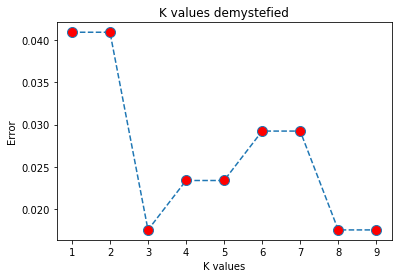

In [91]:
plt.plot(range(1,10),error,"o-",linestyle="dashed",markerfacecolor="red",markersize=10)
plt.xlabel("K values")
plt.ylabel("Error")
plt.title("K values demystefied")

# Performing KNN on IRIS dataset

In [55]:
from sklearn.datasets import load_iris

In [56]:
ir = load_iris()

In [59]:
iris=pd.DataFrame(ir.data,columns=ir.feature_names)

In [61]:
ir.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
x=iris
y=ir.target

In [63]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=123)

In [66]:
lg=LogisticRegression()
lm=lg.fit(xtrain,ytrain)
pred=lg.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [67]:
accuracy_score(ytest,pred)

0.9777777777777777

In [68]:
cohen_kappa_score(ytest,pred)

0.9658832448824868

In [69]:
#knn
sc=StandardScaler()

In [70]:
scaled=sc.fit_transform(iris)
scaled_iris=pd.DataFrame(scaled,columns=iris.columns)

In [72]:
x=scaled_iris
y=ir.target
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.30,random_state=123)

In [73]:
knn= KNeighborsClassifier()
scaled_km=knn.fit(xtrain,ytrain).predict(xtest)

In [74]:
accuracy_score(ytest,scaled_km)

0.9333333333333333

In [75]:
cohen_kappa_score(ytest,scaled_km)

0.8976497346474602

In [76]:
l=LogisticRegression()
scaled_lm=l.fit(xtrain,ytrain).predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [77]:
accuracy_score(ytest,scaled_lm)

0.9555555555555556

In [78]:
cohen_kappa_score(ytest,scaled_lm)

0.9321266968325792

In [79]:
#find the optimal value of K
err=[]
for i in range(1,10):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i=knn.predict(xtest)
    err.append(np.mean(pred_i!=ytest)) # here err is what pred value!=orignal ytest value
err

[0.06666666666666667,
 0.1111111111111111,
 0.08888888888888889,
 0.08888888888888889,
 0.06666666666666667,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889]

Text(0.5, 1.0, 'K values demystefied')

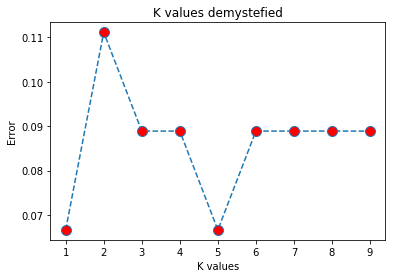

In [82]:
plt.plot(range(1,10),err,"o-",linestyle="dashed",markerfacecolor="red",markersize=10)
plt.xlabel("K values")
plt.ylabel("Error")
plt.title("K values demystefied")

# Network Itrusion - Case study

In [93]:
ni=pd.read_csv("Network_Intrusion.csv")

In [95]:
ni.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [96]:
ni.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [97]:
#deal with class variable which is our target variable
ni["class"].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [99]:
#convert class variable into Dummies
from sklearn.preprocessing import LabelEncoder

In [100]:
le=LabelEncoder()

In [101]:
ni["class"]=le.fit_transform(ni["class"])

In [102]:
ni.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [105]:
ni.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [106]:
#applying getdummies and then applying scaling the data
newnetwork=pd.get_dummies(ni)

In [108]:
newnetwork.head().T

,0,1,2,3,4
duration,0.0,0.00,0.00,0.0,0.00
src_bytes,491.0,146.00,0.00,232.0,199.00
dst_bytes,0.0,0.00,0.00,8153.0,420.00
land,0.0,0.00,0.00,0.0,0.00
wrong_fragment,0.0,0.00,0.00,0.0,0.00
urgent,0.0,0.00,0.00,0.0,0.00
hot,0.0,0.00,0.00,0.0,0.00
num_failed_logins,0.0,0.00,0.00,0.0,0.00
logged_in,0.0,0.00,0.00,1.0,1.00
num_compromised,0.0,0.00,0.00,0.0,0.00


In [110]:
newnetwork["class"]

0        1
1        1
2        0
3        1
4        1
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       1
13       0
14       0
15       0
16       1
17       0
18       1
19       1
20       0
21       0
22       1
23       1
24       0
25       1
26       0
27       1
28       1
29       1
        ..
25162    1
25163    0
25164    1
25165    1
25166    0
25167    1
25168    1
25169    1
25170    0
25171    0
25172    0
25173    1
25174    0
25175    1
25176    1
25177    1
25178    0
25179    0
25180    0
25181    0
25182    0
25183    0
25184    1
25185    1
25186    1
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, Length: 25192, dtype: int32

In [111]:
sc =StandardScaler()

In [112]:
x= pd.DataFrame(sc.fit_transform(newnetwork.drop("class",axis=1)),columns=newnetwork.columns[:118])
y=newnetwork["class"]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [113]:
#splitting data into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

In [117]:
#finding optimal k values
error=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    k=knn.fit(xtrain,ytrain).predict(xtest)
    error.append(np.mean(k!=ytest))
error

KeyboardInterrupt: 

In [ ]:
plt.plot(range(1,20),error,"o-",linestyle="dashed",markerfacecolor="red",markersize=10)
plt.xlabel("K values")
plt.ylabel("Error")
plt.title("K values demystefied")

In [119]:
#at k=8 , err is lowest therefore
knn=KNeighborsClassifier(n_neighbors=8)
k=knn.fit(xtrain,ytrain).predict(xtest)

In [120]:
accuracy_score(ytest,k)

0.9908706006880127

In [121]:
cohen_kappa_score(ytest,k)

0.9816372677457785

# Big Sales Mart - Analytics Vidhya

In [1]:
mart_train = pd.read_csv("Train_Mart.csv")
mart_test = pd.read_csv("Test_Mart.csv")

NameError: name 'pd' is not defined